# 20074_ASSIGNMENT 1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
dfx = pd.read_csv("/content/training_data.csv", header=None)
dfx

,0,1
0,0.389109,-0.271211
1,0.398587,0.258951
2,-0.809148,1.269477
3,-0.498385,1.292512
4,-0.022119,0.610184
...,...,...
4245,-0.908800,1.375915
4246,0.073239,1.000319
4247,-0.810451,0.369553
4248,0.631457,0.337128


In [ ]:
dfy = pd.read_csv("/content/training_data_class_labels.csv", header=None)
dfy

,0
0,1
1,1
2,0
3,0
4,0
...,...
4245,0
4246,0
4247,1
4248,1


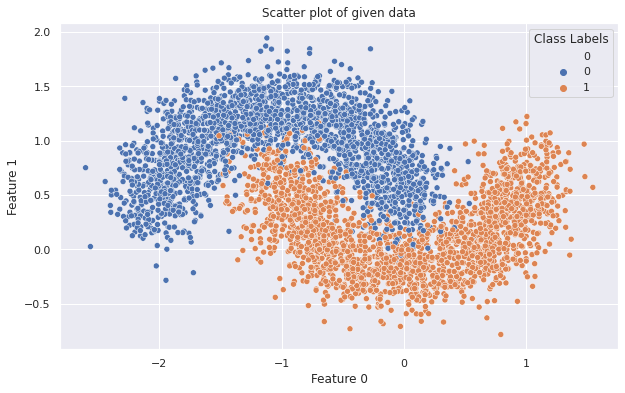

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=dfx, x=0, y=1, hue=dfy[0])
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of given data")
ax.legend(title="Class Labels")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dfx.values, dfy.values, test_size=0.4, random_state=5)
x_train

array([[-0.65036464, -0.66379393],
       [ 1.00562221,  1.22372225],
       [-0.91196912,  0.61910981],
       ...,
       [ 0.64278548,  0.37107365],
       [-1.20579702,  1.15424925],
       [-0.87319849,  0.49264948]])

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [ ]:
# predicting for the test set
y_pred_test_set = forest.predict(x_test)
y_pred_test_set

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_test, y_pred_test_set) # View accuracy score

0.9705882352941176

In [ ]:
confusion_matrix(y_test, y_pred_test_set) # View confusion matrix for test data and predictions

array([[801,  25],
       [ 25, 849]])

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test_set)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


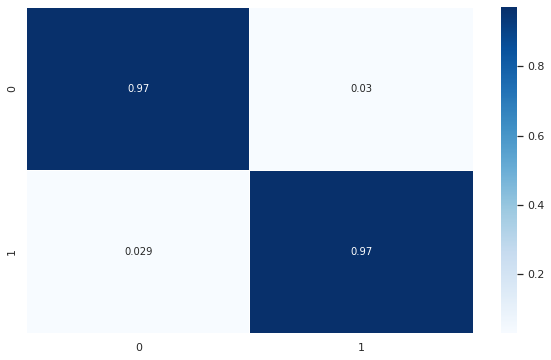

In [ ]:
# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.1)

In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test_set))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       826
           1       0.97      0.97      0.97       874

    accuracy                           0.97      1700
   macro avg       0.97      0.97      0.97      1700
weighted avg       0.97      0.97      0.97      1700



In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_set))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_set))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_set)))

Mean Absolute Error: 0.029411764705882353
Mean Squared Error: 0.029411764705882353
Root Mean Squared Error: 0.17149858514250885


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dfx.values, dfy.values, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler     #feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor                          #here we are traing the algorithm
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Naive Bayes Approach

In [ ]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB


Bernoulli Naive Bayes

In [ ]:
modelBNB = BernoulliNB()
modelBNB.fit(x_train, y_train.ravel())

BernoulliNB()

In [ ]:
predBNB = modelBNB.predict(x_test)
print(classification_report(y_test, predBNB))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       418
           1       0.92      0.71      0.80       432

    accuracy                           0.82       850
   macro avg       0.84      0.82      0.82       850
weighted avg       0.84      0.82      0.82       850



 Gaussian Naive Bayes

In [ ]:
modelGNB = GaussianNB()
modelGNB.fit(x_train, y_train.ravel())

GaussianNB()

In [ ]:
predGNB = modelGNB.predict(x_test)

In [ ]:
print(classification_report(y_test, predGNB))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       418
           1       0.87      0.88      0.87       432

    accuracy                           0.87       850
   macro avg       0.87      0.87      0.87       850
weighted avg       0.87      0.87      0.87       850



Logistic Regression Algorithm approach

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelLog = LogisticRegression()
log_parameters = {
    "C": np.logspace(-2, -1, 30),
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
clfLog = GridSearchCV(modelLog, log_parameters, cv=15, verbose=0, n_jobs=10, scoring="f1_macro")
clfLog.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4050 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

GridSearchCV(cv=15, estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': array([0.01      , 0.01082637, 0.01172102, 0.01268961, 0.01373824,
       0.01487352, 0.01610262, 0.01743329, 0.01887392, 0.0204336 ,
       0.02212216, 0.02395027, 0.02592944, 0.02807216, 0.03039195,
       0.03290345, 0.03562248, 0.0385662 , 0.04175319, 0.04520354,
       0.04893901, 0.05298317, 0.05736153, 0.06210169, 0.06723358,
       0.07278954, 0.07880463, 0.08531679, 0.09236709, 0.1       ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_macro')

In [ ]:
clfLog.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
predLog = clfLog.predict(x_test)
print(classification_report(y_test, predLog))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       418
           1       0.88      0.88      0.88       432

    accuracy                           0.88       850
   macro avg       0.88      0.88      0.88       850
weighted avg       0.88      0.88      0.88       850



K-NEAREST NEIGHBOUR ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2, 10, 1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "haversine",
        "l1",
        "l2",
        "manhattan",
        "non_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}
clfKNN = GridSearchCV(modelKNN, params, cv=15, n_jobs=10)
clfKNN.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1680 fits failed out of a total of 7680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn

GridSearchCV(cv=15, estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['cityblock', 'cosine', 'euclidean',
                                    'haversine', 'l1', 'l2', 'manhattan',
                                    'non_euclidean'],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [ ]:
clfKNN.best_params_

{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 7,
 'weights': 'uniform'}

In [ ]:
predKNN = clfKNN.predict(x_test)
print(classification_report(y_test, predKNN))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       418
           1       0.97      0.97      0.97       432

    accuracy                           0.97       850
   macro avg       0.97      0.97      0.97       850
weighted avg       0.97      0.97      0.97       850



Predicting the test data given

In [ ]:
Final = pd.read_csv("/content/test_data.csv", header=None)
Final

,0,1
0,-0.746294,1.210907
1,-2.442855,0.201630
2,-0.936913,0.086895
3,1.190501,0.454131
4,-1.928923,1.257461
...,...,...
745,0.209941,-0.159565
746,-0.901865,0.202176
747,-1.806417,0.407223
748,-1.083394,0.679260


Here we have used
1. Randomforest
2. Naive Baye's approach
3. Bernoulli Naive approach
4. Gaussian Naive approach
5. Logistic Regression Algorithm
6. K Nearest neighbourhood Approach


Among this the Random forest approach and KNN approach giving same accuracy for f-measure so both the above approaches will give the best performance.

In [ ]:
predictions = clfKNN.predict(Final)
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,

Some  extra type of Scatter Plots:

1. Spectral Clustering:

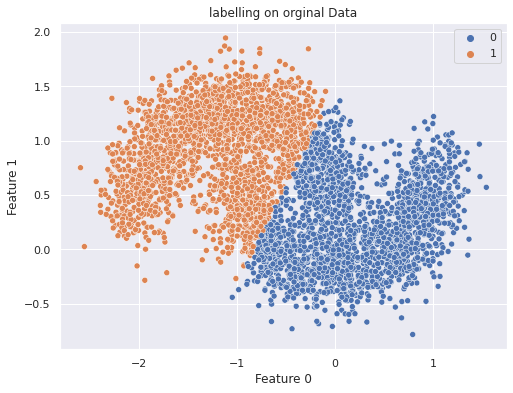

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters = 2,assign_labels='kmeans').fit(dfx)
pred = model.labels_
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfx, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
# ax.legend(title="Class Labels")
# plt.scatter(meanx,meany,c='r')
plt.show()

2. Gaussian Model:

In [ ]:
from sklearn.mixture import GaussianMixture

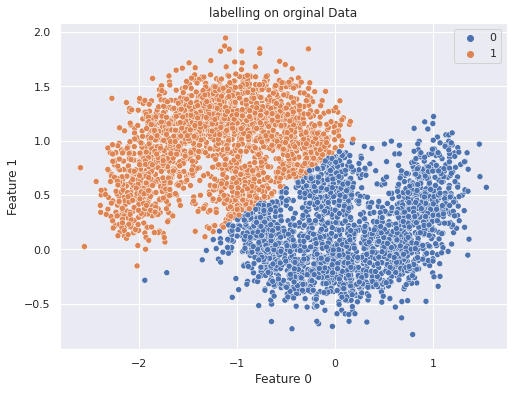

In [ ]:
GMM = GaussianMixture(n_components=2,init_params='kmeans',max_iter=2000,n_init=5).fit(dfx)

pred = GMM.predict(dfx)
# pred
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfx, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
plt.show()

3. Kmeans: By this method we will find out the centroid around which the clustering takes place

In [ ]:
from sklearn.cluster import KMeans

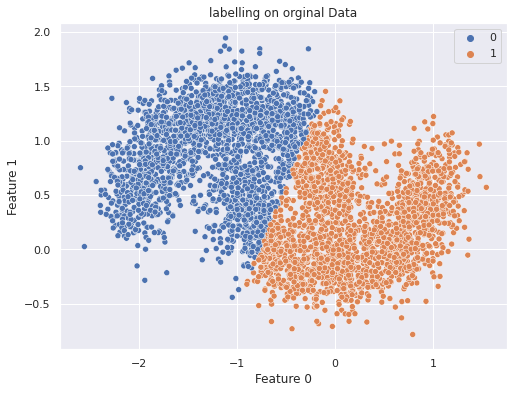

In [ ]:
model = KMeans(n_clusters=2)
model = model.fit(dfx)
pred = model.predict(dfx)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfx, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
plt.show()

In [ ]:
np.savetxt("20074_Baddepudi_E_V_N_M_SaiAsrith_test_data_class_labels.txt", predictions, delimiter="\n", fmt="%.0f")